# Análisis clúster y análisis de anomalías

## 1. Introducción
Una de las tareas del análisis de datos consiste en la identificación de agrupaciones naturales de individuos.

Para esto, normalmente se cuenta con una base de datos cuyas fílas son los individuos de interés
(personas, empresas, transacciones, etc.) y las columnas son sus características. Esto último, que existan muchas variables por cada registro, es muy relevante en esta parte del curso y justifíca el uso de metodologías

multivariadas de agrupación. Estas técnicas usualmente se grupan bajo el título de análisis clúster.
Para el aprendizaje de máquina (machine learning) el análisis clúster hace parte del aprendizaje no
supervisado porque no se tienen concepciones a priori sobre cómo conformar los grupos.

## 2. Análisis clúster

El objetivo del análisis clúster es la identificación de grupos de individuos (o de variables) en conjuntos de datos multidimensionales. Los individuos (variables) que pertenecen a un mismo grupo deben ser parecidos, mientras que los grupos deben ser diferentes entre sí. Aquí, el concepto de parecido (o diferente) dependende de algún tipo de distancia entre las observaciones.
El análisis clúster es popular siempre que exista interes en grupos de individuos (variables). Por ejemplo, en mercadeo, es importante hacer segmentaciones de clientes de acuerdo con sus características para después aplicar estrategias de ventas diferentes enfocadas a cada subgrupo.
En la práctica, se deben tener en cuenta las siguientes recomendaciones:
* En los datos, los elementos que se quieren agrupar deben estar organizados por fílas, mientras que las caracterésticas que definen a estos elementos van por columnas.
* Se debe evitar la presencia de valores perdidos. Si existen se deben imputar o eliminar la observación, teniendo muy en cuenta las posibles consecuencias en términos de sesgo en los datos.
* Las variables deben tener escalas similares.

Con respecto al último punto, los algoritmos de clustering, en general, son sensibles a la escala de las variables. Por ejemplo, en una base de datos de países, se pueden tener como variables el producto interno bruto (PIB) y el crecimiento. Aquí, el PIB suele venir en unidades monetarias, y tener valores incluso de billones, mientras que el crecimiento es un porcentaje. De esta forma, la escala de las variables es muy diferente y el algoritmo tenderá a agrupar con base en la variable de mayor escala, en este caso el PIB. Para evitar esto, las variables pueden estandarizarse (llevar a series con media 0 y varianza 1) o reescalarse (todas tienen el mismo mínimo y máximo).

> **📝 Nota:** Los procesos de estandarización o reescalamiento no aplican si las variables que describen al individuo son categóricas. En este caso, se debe recurrir a opciones distintas como la construcción de variables dummys (dicotómicas, de ceros y unos) o utilizar medidas de distancia capaces de tratar con este tipo de información.

## 2.1. Medidas de distancia

La distancia entre dos observaciones mide su cercanía (como era de esperar). Para un grupo de individuos, se puede obtener una matriz que contenga la distancia entre todos ellos. Como resultado, la matriz de distancias es cuadrada (igual número de filas y columnas) y tiene ceros en su diagonal principal.

La distancia entre un par de individuos 1 y 2, definidos a partir de p variables $x_{1i}, x_{2i}, ... x_{pi}$ con $i = 1,2$ se puede calcular como:

* Distancia Euclídea: $d (x_1, x_2) = \sqrt{\sum_{j=1}^{p} (x_{j1}-x_{j2})^2}$.
* Distancia Manhattan (o del taxista):  $d (x_1, x_2) = \sum_{j=1}^{p} |x_{j1}-x_{j2}|$.
* Distancia de Mahalanobis: $d (x_1, x_2) = \sqrt{{(x_{j1}-x_{j2})^T} * {\Sigma}^{-1} (x_{1}-x_{2})}$ donde $\Sigma$ es la matriz de varianzas y covarianzas entre $x_1$ y $x_2$.

También existen otras medidas basadas en la correlacion entre individuos que son utilizadas en contextos
específicos. En este caso, se considera que dos individuos son parecidos si tienen una alta correlación en sus características, aún cuando los valores que éstas tomen sean muy diferentes:
* Distancia de correlación Pearson: $d (x_1, x_2) = 1 - \dfrac{\sum_{j=1}^{p} (x_{j1} - \bar x)(x_{j2} - \bar x)}{\sqrt{\sum_{j=1}^{p} (x_{j1} - \bar x)^2(x_{j2} - \bar x)^2}}$.

Muchas de las medidas de distancia aplican únicamente a variables numéricas, pero en la práctica es
usual que las características de los individuos estén definidas como series ordinales o incluso categoricas.

Para estos casos se ha desarrollado la distancia de Gower, que agrupa las variables de un conjunto de datos de acuerdo con su naturaleza y aplica las medidas de distancias pertinentes según cada caso: para variables numéricas y ordinales se utiliza la distancia Manhattan (con un ajuste por empates para el segundo caso), y para variables nominales con k categorías se generan k variables indicadoras (dicotómicas) y luego se aplican medidas de similaridad adecuadas. Las distancias de cada caso se combinan de manera lineal, usualmente como un promedio simple.

### 2.1.1. Carga y exploración de datos
A continuación se utilizarán datos empresariales con informacion de estados financieros. En primera instancia, se cargan y exploran los datos, para esto se utilizará la libreria de Pandas:


In [1]:
# Clonar repo de Git
!git clone https://github.com/dfbeltran/cursotomadecisiones.git

Cloning into 'cursotomadecisiones'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 53 (delta 10), reused 46 (delta 6), pack-reused 0
Unpacking objects: 100% (53/53), done.


In [2]:
# Importar librerias que se van a usar
import pandas as pd
from functools import reduce
import numpy as np

# Cargar los datos
caratula = pd.read_csv('/content/cursotomadecisiones/datos/tema_4/Supersociedades SIREM 201706 - Caratula.csv',
                       encoding='latin-1', # Tipo de codificación del archivo (latin-1 dado a que tiene comas)
                       sep = ';') # Seleccionar separador 

efe = pd.read_csv('/content/cursotomadecisiones/datos/tema_4/Supersociedades SIREM 201706 - EFE.csv',
                       encoding='latin-1',
                       sep = ';')

eri = pd.read_csv('/content/cursotomadecisiones/datos/tema_4/Supersociedades SIREM 201706 - ERI.csv',
                       encoding='latin-1',
                       sep = ';')

esf = pd.read_csv('/content/cursotomadecisiones/datos/tema_4/Supersociedades SIREM 201706 - ESF.csv',
                       encoding='latin-1',
                       sep = ';')

ori = pd.read_csv('/content/cursotomadecisiones/datos/tema_4/Supersociedades SIREM 201706 - ORI.csv',
                       encoding='latin-1',
                       sep = ';')

In [3]:
caratula.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15955 entries, 0 to 15954
Data columns (total 12 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   NIT                                                            15955 non-null  int64 
 1   FECHA CORTE                                                    15955 non-null  object
 2   Razón social de la sociedad                                    15955 non-null  object
 3   Corte de cuentas según estatutos                               15955 non-null  object
 4   Estado actual                                                  15955 non-null  object
 5   Clasificación Industrial Internacional Uniforme Versión 4 A.C  15955 non-null  object
 6   Tipo societario                                                15955 non-null  object
 7   La sociedad es                                                 1595

In [4]:
efe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16027 entries, 0 to 16026
Data columns (total 57 columns):
 #   Column                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                         --------------  -----  
 0   NIT                                                                                                                            16027 non-null  int64  
 1   FECHA CORTE                                                                                                                    16027 non-null  object 
 2   DURACION                                                                                                                       16027 non-null  object 
 3   (+/-) Ganancia (pérdida)                                                                                  

In [5]:
eri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16005 entries, 0 to 16004
Data columns (total 19 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Nit                                                          16005 non-null  int64  
 1   Fecha Corte                                                  16005 non-null  object 
 2   Duracion                                                     16005 non-null  object 
 3   Ingresos de actividades ordinarias                           16005 non-null  float64
 4   Costo de ventas                                              13633 non-null  float64
 5   Ganancia bruta                                               16005 non-null  float64
 6   Otros ingresos                                               16005 non-null  float64
 7   Gastos de ventas                                             11296 non-null 

In [6]:
esf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15988 entries, 0 to 15987
Data columns (total 64 columns):
 #   Column                                                                                                                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                  --------------  -----  
 0   Nit                                                                                                                                                                                                                     15988 non-null  int64  
 1   Fecha Corte                                                                                                                                            

In [7]:
ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16009 entries, 0 to 16008
Data columns (total 12 columns):
 #   Column                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                           --------------  -----  
 0   Nit                                                                                                              16009 non-null  int64  
 1   Fecha Corte                                                                                                      16009 non-null  object 
 2   Duracion                                                                                                         16009 non-null  object 
 3   Ganancia (pérdida)                                                                                               16005 non-null  float64
 4   Otro resultado integral, neto de i

A continuación se unen los archivos utilizando como llave el numero de identificación tributaria (NIT) de las empresas. Aquí, se debe notar que la variable identificadora se llama NIT para los elementos Caratula y efe y Nit para los elementos esf y ori, con lo cual se debe estandarizar el nombre.

Una de las buenas practicas cuando se trabaja con bases de datos relacionales es minimizar todas las columnas y reemplazar los espacios por un guión bajo ( _ ), esto facilitá luego autocompletar cuando se usa un IDE. 

In [8]:
def df_bajas_guion_bajo(df):
    '''
    Convierte las columnas de un DataFrame a bajas y transforma
    los espacios en guiones bajo 

    Args:
        df (pd.DataFrame) : El dataframe al que se le aplicará la transformación

    Returns:
        df (pd.DataFrame): El dataframe transformado

    '''   
    df.columns = df.columns.str.lower().str.replace(' ','_')
    return df

In [9]:
# Mapea función a todos los dataframes
caratula, efe, eri, esf, ori = map(df_bajas_guion_bajo, [caratula, efe, eri, esf, ori]) 

In [10]:
efe

,nit,fecha_corte,duracion,(+/-)_ganancia_(pérdida),(+/-)_ajustes_por_gastos_por_impuestos_a_las_ganancias,(_+_)_ajustes_por_gastos_de_depreciación_y_amortización,(+/-)_ajustes_por_deterioro_de_valor_(reversiones_de_pérdidas_por_deterioro_de_valor)_reconocidas_en_el_resultado_del_periodo,(+)_ajustes_por_provisiones,(+)_ajustes_por_costos_financieros,(+/-)_ajustes_por_pérdidas_(ganancias)_de_moneda_extranjera_no_realizadas,(+/-)_ajustes_por_pérdidas_(ganancias)_del_valor_razonable,(-)_ajustes_por_ganancias_no_distribuidas_de_asociadas,(+/-)_ajustes_por_pérdidas_(ganancias)_por_la_disposición_de_activos_no_corrientes,(+/-)_otros_ajustes_para_conciliar_la_ganancia_(pérdida),total_ajustes_para_conciliar_la_ganancia_(pérdida),(+/-)_ajustes_por_disminuciones_(incrementos)_en_los_inventarios,(+/-)_ajustes_por_la_disminución_(incremento)_de_cuentas_por_cobrar_de_origen_comercial,(+/-)_ajustes_por_disminuciones_(incrementos)_en_otras_cuentas_por_cobrar_derivadas_de_las_actividades_de_operación,(+/-)_ajustes_por_el_incremento_(disminución)_de_cuentas_por_pagar_de_origen_comercial,(+/-)_ajustes_por_incrementos_(disminuciones)_en_otras_cuentas_por_pagar_derivadas_de_las_actividades_de_operación,(+/-)_otras_entradas_(salidas)_de_efectivo,flujos_de_efectivo_netos_procedentes_de_(utilizados_en)_actividades_de_operación,(+)_flujos_de_efectivo_procedentes_de_la_pérdida_de_control_de_subsidiarias_u_otros_negocios,(-)_flujos_de_efectivo_utilizados_para_obtener_el_control_de_subsidiarias_u_otros_negocios,(+)_otros_cobros_por_la_venta_de_patrimonio_o_instrumentos_de_deuda_de_otras_entidades,(-)_otros_pagos_para_adquirir_patrimonio_o_instrumentos_de_deuda_de_otras_entidades,(+)_otros_cobros_por_la_venta_de_participaciones_en_negocios_conjuntos,(-)_otros_pagos_para_adquirir_participaciones_en_negocios_conjuntos,"(+)_importes_procedentes_de_la_venta_de_propiedades,_planta_y_equipo","(-)_compras_de_propiedades,_planta_y_equipo",(+)_importes_procedentes_de_ventas_de_activos_intangibles,(-)_compras_de_activos_intangibles,(+)_recursos_por_ventas_de_otros_activos_a_largo_plazo,(-)_compras_de_otros_activos_a_largo_plazo,"(-)_pagos_derivados_de_contratos_de_futuro,_a_término,_de_opciones_y_de_permuta_financiera","(+)_cobros_procedentes_de_contratos_de_futuro,_a_término,_de_opciones_y_de_permuta_financiera",(+)_dividendos_recibidos,(+)_intereses_recibidos,(+/-)_otras_entradas_(salidas)_de_efectivo.1,flujos_de_efectivo_netos_procedentes_de_(utilizados_en)_actividades_de_inversión,(+)_importes_procedentes_de_aumento_de_capital_y/o_recolocación_de_acciones,(-)_disminución_de_capital_social_y/o_readquisición_de_acciones,(-)_pagos_por_otras_participaciones_en_el_patrimonio,(+)_importe_procedente_del_aumento_prima_por_emisión,(-)_disminución_de_prima_por_emisión,(+)_importes_procedentes_de_préstamos,(-)_reembolsos_de_préstamos,(-)_pagos_de_pasivos_por_arrendamientos_financieros,(-)_dividendos_pagados,(-)_intereses_pagados,(+/-)_otras_entradas_(salidas)_de_efectivo.2,flujos_de_efectivo_netos_procedentes_de_(utilizados_en)_actividades_de_financiación,"incremento_(disminución)_neto_de_efectivo_y_equivalentes_al_efectivo,_antes_del_efecto_de_los_cambios_en_la_tasa_de_cambio",(+/-)_efectos_de_la_variación_en_la_tasa_de_cambio_sobre_el_efectivo_y_equivalentes_al_efectivo,incremento_(disminución)_neto_de_efectivo_y_equivalentes_al_efectivo,efectivo_y_equivalentes_al_efectivo_al_principio_del_periodo,efectivo_y_equivalentes_al_efectivo_al_final_del_periodo
0,800000090,31/12/2016,2016,12469.0,NaN,167834.0,NaN,NaN,NaN,NaN,NaN,NaN,66795.0,NaN,234629.0,-17838.0,-182132.0,NaN,-42904.0,228693.0,38158.0,271075.0,NaN,NaN,4500.0,NaN,NaN,NaN,NaN,133033.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-150461.0,-278994.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7919.0,NaN,-7919.0,23134.0,15215.0
1,800000268,31/12/2016,2016,15955.0,-12380.0,126463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114083.0,4076.0,0.0,-3341.0,73974.0,-228532.0,NaN,-23785.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [11]:
# Unir todos los DataFrames
df_financial = reduce(lambda  left,right: pd.merge(left,right,on=['nit','fecha_corte', 'duracion'], how='inner', suffixes=('', '_y')), [efe, eri, ori])
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['nit','fecha_corte'], how='inner'), [caratula, esf, df_financial])
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16060 entries, 0 to 16059
Columns: 154 entries, nit to total_otro_resultado_integral_que_se_reclasificará_al_resultado_del_periodo,_neto_de_impuestos
dtypes: float64(132), int64(9), object(13)
memory usage: 19.0+ MB


A continuación se seleccionan las características sobre las cuales se aplicarán los algoritmos de clasificación y se analiza el tipo de cada variables mediante el comando `dtype`

In [12]:
columnas = ['nit', 'razón_social_de_la_sociedad', 'estado_actual',
 'clasificación_industrial_internacional_uniforme_versión_4_a.c',
 'tipo_societario', 'departamento_de_la_dirección_de_notificación_judicial',
 'ciudad_de_la_dirección_de_notificación_judicial','activos_corrientes_totales',
 'total_de_activos_no_corrientes','total_de_activos','pasivos_corrientes_totales',
 'total_de_pasivos_no_corrientes','total_pasivos','patrimonio_total',
 'ingresos_de_actividades_ordinarias','costo_de_ventas','ganancia_bruta',
 'otros_ingresos', 'gastos_de_ventas', 'gastos_de_administración', 'otros_gastos',
 'ganancia_(pérdida)_por_actividades_de_operación','ingresos_financieros',
 'costos_financieros','ganancia_(pérdida),_antes_de_impuestos','ganancia_(pérdida)']

new_col_names = ['nit','nombre','estado','ciiu','tipo_soc','dpto','ciudad',
                  'activo_cte','activo_no_cte','activo','pasivo_cte','pasivo_no_cte',
                  'pasivo','patrimonio','ingreso','costo_venta','ganancia_bruta',
                  'otro_ingreso','gasto_venta','gasto_admon','gasto_otro','ganancia_operacion',
                  'ingreso_fin','costo_fin','ganancia_antes_imp', 'ganancia']

In [13]:
datos = df_merged[columnas].copy()
datos.columns = new_col_names
datos.dtypes

nit                     int64
nombre                 object
estado                 object
ciiu                   object
tipo_soc               object
dpto                   object
ciudad                 object
activo_cte            float64
activo_no_cte         float64
activo                  int64
pasivo_cte            float64
pasivo_no_cte         float64
pasivo                  int64
patrimonio              int64
ingreso               float64
costo_venta           float64
ganancia_bruta        float64
otro_ingreso          float64
gasto_venta           float64
gasto_admon           float64
gasto_otro            float64
ganancia_operacion      int64
ingreso_fin           float64
costo_fin             float64
ganancia_antes_imp      int64
ganancia                int64
dtype: object

Se construyen algunos indicadores financieros adicionales y se calcula la cantidad de observaciones perdidas en el elemento datos:

In [14]:
datos['ingreso_activo'] = datos['ingreso']/datos['activo']
datos['ingreso_activo'] = datos['ingreso_activo'].replace(np.inf, 0) # en caso de división por 0 
datos['ingreso_patrimonio'] = datos['ingreso']/datos['patrimonio']
datos['ingreso_patrimonio'] = datos['ingreso_patrimonio'].replace(np.inf, 0) # en caso de división por 0 

Una de las buenas practicas dentro de la industria es reducir el consumo de RAM asignando la precisión númerica correcta, en especial cuando se trabajan con grandes set de datos. Se construye por lo tanto se construye una función que permite reducir el tamaño en RAM del set de datos.

In [15]:
def load_and_reduce_mem_usage(df):
    """
    Load a dataframe using pandas and reduce memory according to max-min
    in each column
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print(f'Start memory usage of dataframe is {start_mem:.2f} MB')
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object and col_type.name != 'category':
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float32)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
    
    if df[col].nunique() < 60:
        df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print(f'Memory usage after optimization is {end_mem:.2f} MB')
    delta_memory = (start_mem - end_mem) / start_mem
    print(f'Decreased by {delta_memory:.1%} \n --------')

    return df

In [16]:
datos = load_and_reduce_mem_usage(datos)

Start memory usage of dataframe is 3.55 MB
Memory usage after optimization is 2.51 MB
Decreased by 29.3% 
 --------


In [17]:
datos.dtypes

nit                      int32
nombre                category
estado                category
ciiu                  category
tipo_soc              category
dpto                  category
ciudad                category
activo_cte             float32
activo_no_cte          float32
activo                   int64
pasivo_cte             float32
pasivo_no_cte          float32
pasivo                   int32
patrimonio               int64
ingreso                float32
costo_venta            float32
ganancia_bruta         float32
otro_ingreso           float32
gasto_venta            float32
gasto_admon            float32
gasto_otro             float32
ganancia_operacion       int32
ingreso_fin            float32
costo_fin              float32
ganancia_antes_imp       int32
ganancia                 int32
ingreso_activo         float32
ingreso_patrimonio     float32
dtype: object

### 2.1.2. Procesamiento de datos

Como se mencionó anteriormente, para calcular la distancia entre un grupo de individuos se deben estandarizar (o reescalar) sus variables previamente.

En python y particularmente en la industria una de las buenas practicas es usar Pipelines (tuberias) de datos, los pipelines facilitan el preprocesamiento, limpiando código y colapsando todos los pasos de preprocesamiento y modelado en una sola línea de código.

In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [19]:
def pipeline_transformacion(df, crear_dummies = False):
    '''
    Pipeline de preprocesamiento
    '''
    columnas_numericas = df.select_dtypes('number').columns.to_list()

    if 'nit' in columnas_numericas:
        columnas_numericas.remove('nit')

    columnas_categoricas =  df.select_dtypes('category').columns.to_list()

    transformador_numerico =  Pipeline(steps=[('inputar', SimpleImputer(strategy='mean')),
                                              ('scaler', StandardScaler())])
    if crear_dummies:
        scaler = ColumnTransformer(transformers=[('num', transformador_numerico, columnas_numericas),
                                                ('cat', OneHotEncoder(), columnas_categoricas)], 
                                remainder = 'passthrough')
    else: 
        scaler = ColumnTransformer(transformers=[('num', transformador_numerico, columnas_numericas)], 
                                                remainder = 'passthrough')
    
    return scaler.fit(df)

In [20]:
primeros_10_datos = datos.iloc[[0,1,3,4,5,7,8,9,10,11], :]
transformador = pipeline_transformacion(primeros_10_datos, crear_dummies = False)
primeros_10_datos[['activo','pasivo']]

,activo,pasivo
0,6542076,5352469
1,3419876,2499818
3,6078941,2981565
4,3011514,1656877
5,3338792,1189886
7,3895103,1599243
8,26067582,5874421
9,3668777,1273890
10,58531475,22447935
11,15048091,7511824


In [21]:
columns = list(transformador.transformers_[0][2]) + list(datos.columns[list(transformador.transformers_[1][2])])
primeros_10_datos_transformados = pd.DataFrame(transformador.transform(primeros_10_datos),
                                               columns=columns)
primeros_10_datos_transformados = primeros_10_datos_transformados.astype({'activo':'float', 'pasivo':'float'})
primeros_10_datos_transformados[['activo','pasivo']]

,activo,pasivo
0,-0.384071,0.018625
1,-0.570908,-0.448756
2,-0.411786,-0.369826
3,-0.595345,-0.586864
4,-0.575760,-0.663376
5,-0.542470,-0.596306
6,0.784363,0.104142
7,-0.556013,-0.649612
8,2.727048,2.819558
9,0.124941,0.372415


Con los Pipelines fue posible transformar todos los datos numéricos, adicionalmente si queremos crear variables dummies para nuestros datos categóricos, lo podemos hacer fácilmente. 

La gran ventaja que tienen los pipelines es que puedo recibir otra base después y las columnas pueden pasar por el mismo proceso, esto es extremadamente útil particularmente en el aprendizaje por refuerzo supervisado cuando se tiene un conjunto de datos para el entrenamiento y otro de pruebas y se le quiere realizar las mismas transformaciones. 

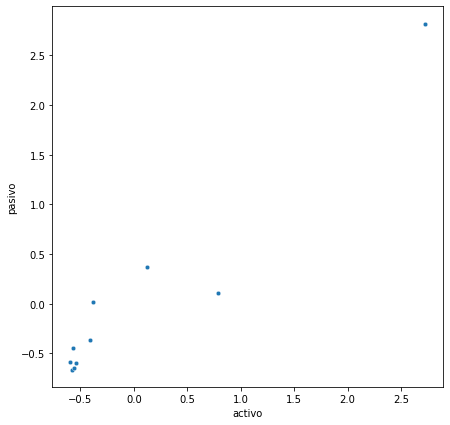

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=primeros_10_datos_transformados, x="activo", y="pasivo", s= 20);

### 2.1.3. Matrices de distancias

La matriz de distancias Euclídeas entre los 10 individuos seleccionados se calcula mediante el la libreria de Sklearn, importando `euclidean_distances`

In [23]:
from sklearn.metrics.pairwise import euclidean_distances

dist_eucl = pd.DataFrame(euclidean_distances(primeros_10_datos_transformados[['activo','pasivo']]))
dist_eucl

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.503341,0.389438,0.641290,0.708427,0.635004,1.171559,0.690004,4.186202,0.619888
1,0.503341,0.000000,0.177623,0.140253,0.214675,0.150266,1.463713,0.201408,4.643101,1.076349
2,0.389438,0.177623,0.000000,0.284252,0.336243,0.261480,1.286630,0.314773,4.474868,0.915968
3,0.641290,0.140253,0.284252,0.000000,0.078979,0.053712,1.543075,0.074057,4.758362,1.199595
4,0.708427,0.214675,0.336243,0.078979,0.000000,0.074877,1.561735,0.024070,4.799934,1.250538
5,0.635004,0.150266,0.261480,0.053712,0.074877,0.000000,1.500371,0.055000,4.728412,1.176375
6,1.171559,1.463713,1.286630,1.543075,1.561735,1.500371,0.000000,1.537776,3.338789,0.711904
7,0.690004,0.201408,0.314773,0.074057,0.024070,0.055000,1.537776,0.000000,4.776362,1.228104
8,4.186202,4.643101,4.474868,4.758362,4.799934,4.728412,3.338789,4.776362,0.000000,3.572040
9,0.619888,1.076349,0.915968,1.199595,1.250538,1.176375,0.711904,1.228104,3.572040,0.000000


La misma matriz pero utilizando la distancia Mahattan se obtiene de importando `manhattan_distances`

In [24]:
from sklearn.metrics.pairwise import manhattan_distances

dist_man = pd.DataFrame(manhattan_distances(primeros_10_datos_transformados[['activo','pasivo']]))
dist_man

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.654217,0.416165,0.816762,0.873690,0.773330,1.253951,0.840180,5.912052,0.862802
1,0.654217,0.000000,0.238052,0.162545,0.219472,0.175989,1.908168,0.215752,6.566270,1.517019
2,0.416165,0.238052,0.000000,0.400597,0.457524,0.357165,1.670116,0.424014,6.328218,1.278967
3,0.816762,0.162545,0.400597,0.000000,0.096097,0.062318,2.070713,0.102080,6.728815,1.679564
4,0.873690,0.219472,0.457524,0.096097,0.000000,0.100360,2.127640,0.033510,6.785742,1.736492
5,0.773330,0.175989,0.357165,0.062318,0.100360,0.000000,2.027281,0.066850,6.685382,1.636132
6,1.253951,1.908168,1.670116,2.070713,2.127640,2.027281,0.000000,2.094130,4.658102,0.927695
7,0.840180,0.215752,0.424014,0.102080,0.033510,0.066850,2.094130,0.000000,6.752232,1.702982
8,5.912052,6.566270,6.328218,6.728815,6.785742,6.685382,4.658102,6.752232,0.000000,5.049250
9,0.862802,1.517019,1.278967,1.679564,1.736492,1.636132,0.927695,1.702982,5.049250,0.000000


Si se desea incluir la variable categorica `ciiu` se debe recurrir a la distancia Gower. En este caso se utiliza Sklearn no cuenta aun con soporte para esta distancia por lo que importamos la libreria `gower` y usamos la función `gower_matrix`.

In [25]:
!pip install gower

  Created wheel for gower: filename=gower-0.0.5-py3-none-any.whl size=4231 sha256=010330083624262ce3048a19a36d055fb628d1ccf2b07542acb46db8407bacef
  Stored in directory: /root/.cache/pip/wheels/3e/f9/9a/67122a959a424e9cbb4557a8366c871a30e31cd75f0d003db4
Successfully built gower


In [26]:
import gower
dist_gow = gower.gower_matrix(primeros_10_datos_transformados[['activo','pasivo','ciiu']], cat_features=[False,False,True])
pd.DataFrame(dist_gow)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.396809,0.373290,0.412478,0.417836,0.408077,0.458746,0.414538,0.913532,0.418262
1,0.396809,0.000000,0.356852,0.349003,0.354360,0.350308,0.522222,0.354051,0.977008,0.481737
2,0.373290,0.356852,0.000000,0.372521,0.377879,0.368120,0.498703,0.374581,0.953490,0.458219
3,0.412478,0.349003,0.372521,0.000000,0.342621,0.339542,0.537891,0.343285,0.992677,0.164073
4,0.417836,0.354360,0.377879,0.342621,0.000000,0.343092,0.543249,0.336632,0.998035,0.502764
5,0.408077,0.350308,0.368120,0.339542,0.343092,0.000000,0.533490,0.339794,0.988276,0.493005
6,0.458746,0.522222,0.498703,0.537891,0.543249,0.533490,0.000000,0.539950,0.788120,0.425168
7,0.414538,0.354051,0.374581,0.343285,0.336632,0.339794,0.539950,0.000000,0.994737,0.499466
8,0.913532,0.977008,0.953490,0.992677,0.998035,0.988276,0.788120,0.994737,0.000000,0.828604
9,0.418262,0.481737,0.458219,0.164073,0.502764,0.493005,0.425168,0.499466,0.828604,0.000000


Mediante la libreria seaborn se puede generar una representación visual de las distancias entre individuos, tomando como argumento las distancias previamente calculadas:

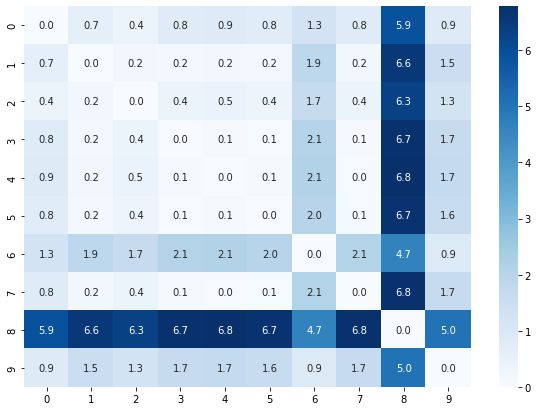

In [27]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(dist_man, cmap='Blues', annot=True, fmt='.1f');

## 2.2. Clustering particional

Los métodos de clustering particional buscan clasificar los individuos en uno de varios grupos posibles, generados a partir del conjunto de datos con el que se está trabajando. Para esto se utiliza su similaridad (distancia), tratando que todas las observaciones en un grupo sean parecidas, mientras que los grupos sean diferentes entre sí. En esta sección se presentará el método de K-medias y K-medioides.

### 2.2.1. Clustering por K-medias

El procedimiento de K-medias fue propuesto por MacQueen en 1967, y busca dividir un conjunto de datos en K grupos, maximizando la similaridad intraclase y minimizando la similaridad interclase. Cada grupo está caracterizado por su promedio (p dimensional).

Se define la variación total entre cluster como la suma de las distancias entre los individuos y el centroide del grupo:

$W(C_k) = \sum_{x_i \in c_k} dist(x_i, \mu_k)$

donde $x_i$ es un vector que caracteriza al individuo $i$, $\mu_k$ es el vector de medias para las observaciones que pertenencen al grupo $k$ y $dist$ es una medida de distancia, usualmente la distancia Euclídea. De esta forma, cada registro se asigna a un grupo tal que su distancia al centro del grupo es mínima. Adicionalmente, se
define la variación total entre cluster como:

$VTC = \sum_{k=1}^{K} W(C_k) = \sum_{k=1}^{K} \sum_{x_i \in c_k} dist(x_i, \mu_k)$ 

El primer paso en el algoritmo consiste en la selección de K. Posteriormente, los individuos se asignan aleatoriamente para conformar K grupos y se calculan los centroides (mediante medias) respectivos. Tomando los 10 individuos del ejemplo anterior y K = 2 se tiene:

In [28]:
np.random.seed(777)
cluster = primeros_10_datos_transformados[['activo','pasivo']].copy()
cluster['g1'] = np.random.randint(1, 3, size = cluster.shape[0])

In [29]:
cluster_centro = cluster.groupby('g1').agg({'activo':'mean', 'pasivo':'mean'})
cluster_centro

,activo,pasivo
g1,,
1,-0.235202,-0.107224
2,0.058800,0.026806


Posteriormente se calculan las distancias (por ejemplo, Euclídea) de los individuos al centroide de cada grupo, y las observaciones se asignan al grupo donde la distancia al centro es menor:

In [30]:
cluster['dg1'] = np.sqrt(np.square(cluster['activo']-cluster_centro['activo'][1]) + 
                         np.square(cluster['pasivo']-cluster_centro['pasivo'][1]))
cluster['dg2'] = np.sqrt(np.square(cluster['activo']-cluster_centro['activo'][2]) +
                         np.square(cluster['pasivo']-cluster_centro['pasivo'][2]))
cluster['g2'] = 1
cluster['g2'] = np.where(cluster['dg2']< cluster['dg1'], 2, cluster['g2'])
cluster

,activo,pasivo,g1,dg1,dg2,g2
0,-0.384071,0.018625,2,0.194936,0.442947,1
1,-0.570908,-0.448756,2,0.478897,0.789108,1
2,-0.411786,-0.369826,2,0.316451,0.615441,1
3,-0.595345,-0.586864,1,0.599797,0.896937,1
4,-0.575760,-0.663376,2,0.652138,0.937560,1
5,-0.542470,-0.596306,2,0.577594,0.865907,1
6,0.784363,0.104142,2,1.041244,0.729672,2
7,-0.556013,-0.649612,2,0.630163,0.914078,1
8,2.727048,2.819558,2,4.164250,3.862513,2
9,0.124941,0.372415,1,0.599797,0.351881,2


A partir de los nuevos grupos, el procedimiento de cálculo de centroides, cálculo de distancias y asignación en grupos se repite hasta que no haya variación:

In [31]:
variacion = 1
while variacion > 0: 
    cluster_centro = cluster.groupby('g2').agg({'activo':'mean', 'pasivo':'mean'})
    cluster['dg1'] = np.sqrt(np.square(cluster['activo']-cluster_centro['activo'][1]) + 
                             np.square(cluster['pasivo']-cluster_centro['pasivo'][1]))
    cluster['dg2'] = np.sqrt(np.square(cluster['activo']-cluster_centro['activo'][2]) + 
                             np.square(cluster['pasivo']-cluster_centro['pasivo'][2]))
    grupo = cluster['g2'].copy()
    cluster['g2']= 1
    cluster['g2'] = np.where(cluster['dg2']< cluster['dg1'], 2, cluster['g2'])
    variacion = np.sum(np.square(grupo - cluster['g2']))
    print(variacion)

1
1
0


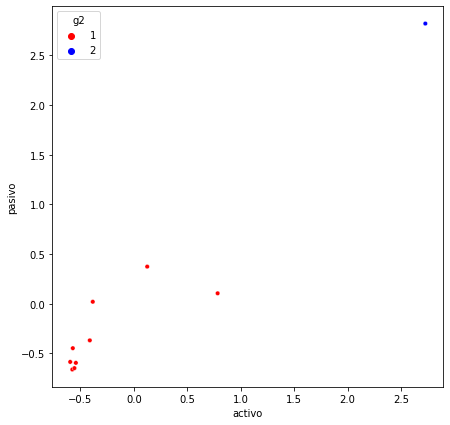

In [32]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=cluster, x="activo", y="pasivo", s= 20, hue='g2',  palette=['red','blue']);

Ahora, en python podemos utilizar la libreria Sklearn e importar kmeans. Utilizaremos el elemento datos con las variables activo y pasivo, y generaremos K = 5 grupos:

In [43]:
from sklearn.cluster import KMeans

transformador = pipeline_transformacion(datos[['activo','pasivo']], crear_dummies = False)
cluster = pd.DataFrame(transformador.transform(datos[['activo','pasivo']]), columns=['activo','pasivo'])

kmeans = KMeans(n_clusters=7, random_state=2021).fit(cluster)

cluster['kmean_cluster'] = kmeans.predict(cluster)

In [44]:
cluster['kmean_cluster'].value_counts().sort_index()

0    14076
1       38
2        1
3      234
4        2
5     1669
6       40
Name: kmean_cluster, dtype: int64

Seguramente, la primera inquietud que surge es cómo escoger K. Para esto, se ha propuesto generar clusters con $K = 2, 3, ...,N-1$ (o algún límite superior, usualmente muy por debajo de N-1) y analizar
el comportamiento de la suma de cuadrados al interior para cada caso. 

In [ ]:
!pip install yellowbrick -U

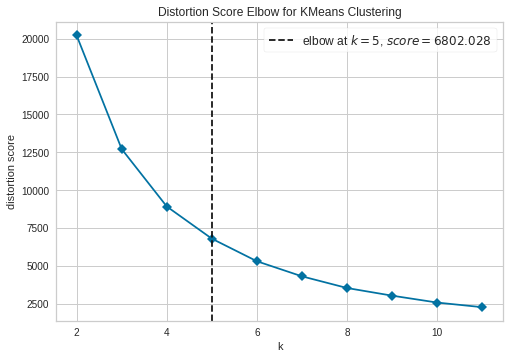

In [52]:
from yellowbrick.cluster import KElbowVisualizer

transformador = pipeline_transformacion(datos[['activo','pasivo']], crear_dummies = False)
cluster = pd.DataFrame(transformador.transform(datos[['activo','pasivo']]), columns=['activo','pasivo'])

# Inicializar el modelo de clustering model y visualizador
model = KMeans(random_state=2021)
visualizer = KElbowVisualizer(model,
                              k=(2,12), 
                              metric='distortion',
                              timings=False,
                              locate_elbow=True)

visualizer.fit(cluster) 
visualizer.show();

Se observa que la medida de error de clasificación disminuye en la medida que aumenta K. Aquí se escoge
K en el punto donde se observe un codo, aparentemente en K = 5. Finalmente, se genera la agrupación
con K = 5, utilizando la opción n_init = 20 para forzar a que el algoritmo se ejecute 20 veces y escoja el
resultado con mejor desempeño:

In [53]:
kmeans = KMeans(n_clusters=5, random_state=2021, n_init=20).fit(cluster)
cluster['kmean_cluster'] = kmeans.predict(cluster)
cluster['kmean_cluster'].value_counts().sort_index()

0    15052
1       70
2        1
3      935
4        2
Name: kmean_cluster, dtype: int64

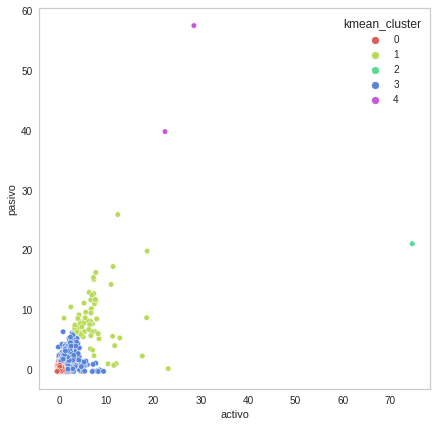

In [62]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=cluster, x="activo", y="pasivo", s= 30, hue='kmean_cluster',
                palette=sns.color_palette("hls", cluster['kmean_cluster'].nunique()))
ax.grid(False);